# Restaurants in Banglore - Descriptive Analysis and Rating Predictor

# 1. Introduction

The basic idea of analyzing this dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Banglore.

# A Quick introduction about Banglore

Banglore also popularly known as "The Silicon Valley of India" is a tech hub and one of the most liveable places in India. People from all parts of India come and stay at Banglore.

It has more than 12,000 restaurants with restaurants serving dishes from all over the world. The IT industry in Banglore has come to the saturation but the food industry hasn't yet and the demand is increasing day by day.

We 4 people wanted to start a new restaurant "ABCD Bytes" in Banglore. So we are doing some analysis on the existing restaurants to find out our target locations, target cusines and our target audiences. In the process we are building a model to predict the ratings of the restaurants which would help us in getting the estimated rating our "ABCD Bytes".

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
df = pd.read_csv('datasets/zomato.csv', encoding='utf-8')

# 2. Data Pre-processing

In [194]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [196]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [197]:
df.shape

(51717, 17)

In [198]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [199]:
#Missing Values
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [200]:
df=df[df.cuisines.isna()==False]

In [201]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7741
votes                              0
phone                           1179
location                           0
rest_type                        206
dish_liked                     28033
cuisines                           0
approx_cost(for two people)      320
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [202]:
df.drop(columns=["url", 'address','phone','listed_in(city)'], inplace  =True)

In [203]:
df.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [204]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet


# 3. Exploratory Data Analysis

# a. Target Locations

Let us look at the top 10 most foodie areas in Banglore

Text(0, 0.5, 'Count of restaurants')

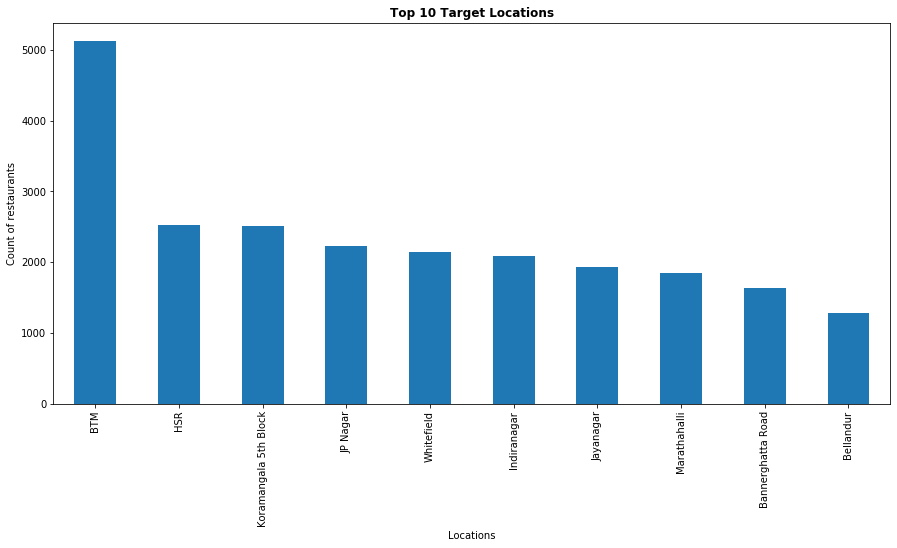

In [205]:
target_locations = df['location'].value_counts()
top_ten_target_locations = target_locations[:10]

plt.figure(figsize=(15,7)) 
top_ten_target_locations.plot(kind = 'bar')
plt.title('Top 10 Target Locations', weight = 'bold')
plt.xlabel('Locations')
plt.ylabel('Count of restaurants')

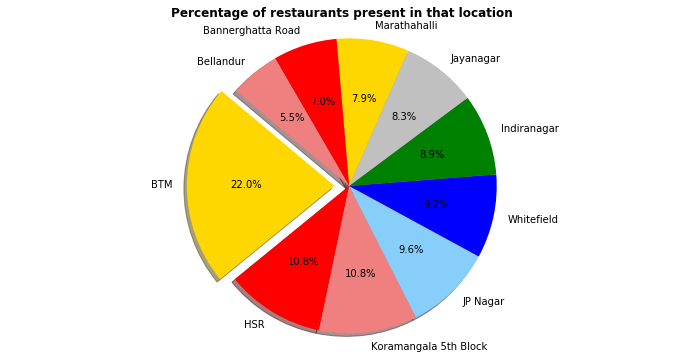

In [206]:
plt.figure(figsize = (12,6))
names = df['location'].value_counts()[:10].index
values = df['location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

Note: We have the highest no of restaurants in BTM and the least in Bellandur.

# b. Target Restaurant Category

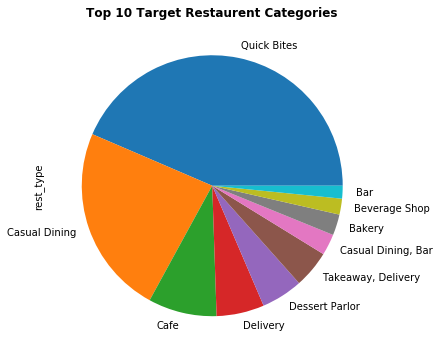

In [207]:
target_restaurant_categories = df['rest_type'].value_counts()

top_ten_target_restaurant_categories = target_restaurant_categories[:10]

plt.figure(figsize = (12,6))
top_ten_target_restaurant_categories.plot(kind = 'pie')
plt.title('Top 10 Target Restaurent Categories', weight = 'bold')
plt.show()

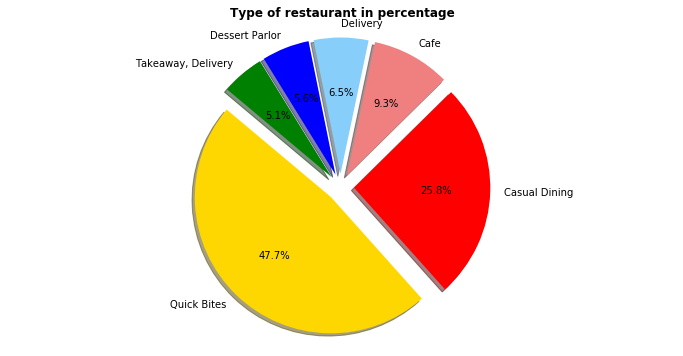

In [208]:
plt.figure(figsize = (12,6))
names = df['rest_type'].value_counts()[:6].index
values = df['rest_type'].value_counts()[:6].values
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice

plt.title('Type of restaurant in percentage', weight = 'bold')
plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Note: The most frequently visited Restaurant type - "Quickbites"

# c. Target Cuisine Style

Text(0, 0.5, 'Count of restaurants')

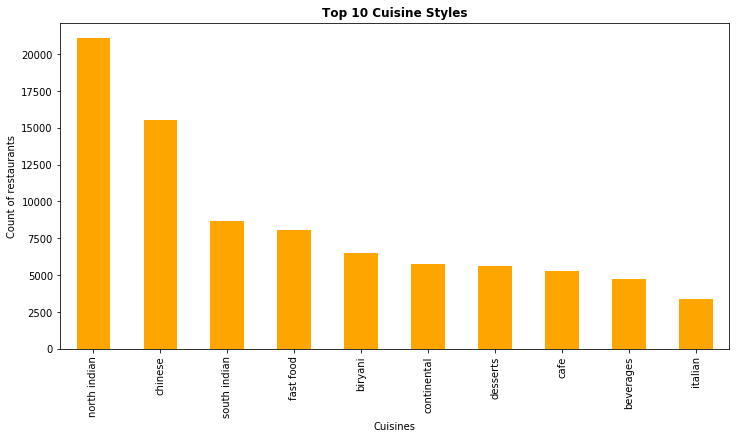

In [209]:
cuisines_data = df[df.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())

cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)
        
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'orange')
plt.title('Top 10 Cuisine Styles',weight='bold')
plt.xlabel('Cuisines')
plt.ylabel('Count of restaurants')

# d. Target Dish

C:\Users\Idea\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Text(0, 0.5, 'Count')

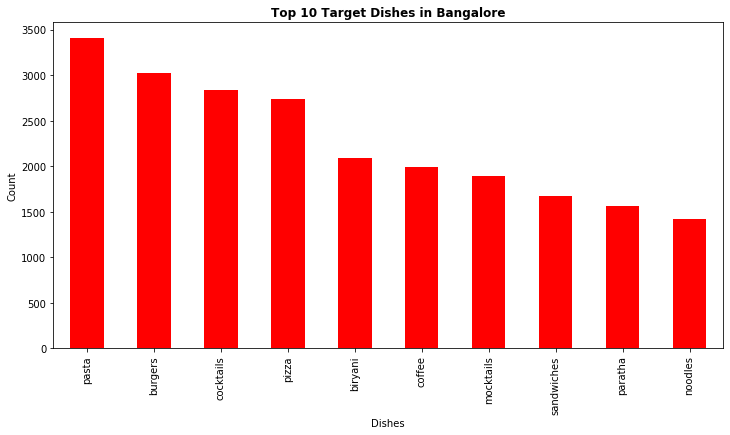

In [210]:
dishes_data = df[df.dish_liked.notnull()]
dishes_data.dish_liked = dishes_data.dish_liked.apply(lambda x:x.lower().strip())

dishes_data.isnull().sum()

dish_count = []
for i in dishes_data.dish_liked:
    for t in i.split(','):
        t = t.strip()
        dish_count.append(t)
        
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'red')
plt.title('Top 10 Target Dishes in Bangalore',weight='bold')
plt.xlabel('Dishes')
plt.ylabel('Count')

# e. Target Price Range

We are considering the average cost factor for 2 persons.

In [211]:
average_cost = df['average_cost'].value_counts()

average_cost[:20]

300      7576
400      6554
500      4977
200      4855
600      3712
250      2959
800      2285
150      2064
700      1948
350      1763
1,000    1637
450      1417
1,200     993
100       991
1,500     971
650       776
550       761
750       758
900       700
1,300     516
Name: average_cost, dtype: int64

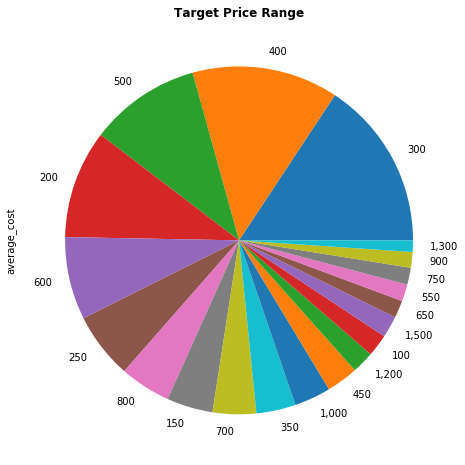

In [212]:
plt.figure(figsize = (12,8))
average_cost[:20].plot(kind = 'pie')
plt.title('Target Price Range', weight = 'bold')
plt.show()

Note: The Average cost for two persons in Banglore is 300 Rupees

# e. Target Rating

In [213]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

In [214]:
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r: r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r: float(r))

3.9058343007007914


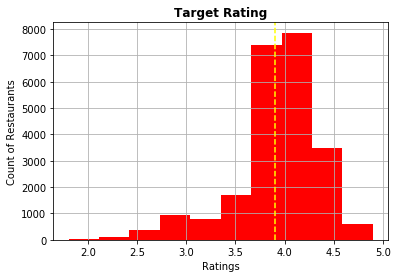

In [215]:
df.rate.hist(color='red')
plt.axvline(x= df.rate.mean(),ls='--',color='yellow')
plt.title('Target Rating',weight='bold')
plt.xlabel('Ratings')
plt.ylabel('Count of Restaurants')
print(df.rate.mean())

Note: The Average rating for restaurants in Banglore is found to be 3.9

# f. Restaurants accepting online orders

Text(0.5, 0, 'online orders')

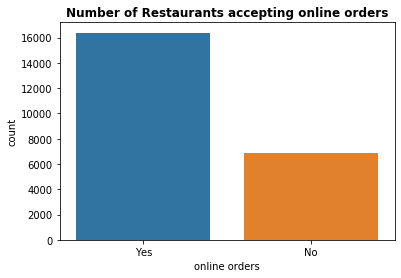

In [216]:
ax= sns.countplot(df['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

# g. Rating - online order

Text(0.5, 1.0, 'rate vs online order')

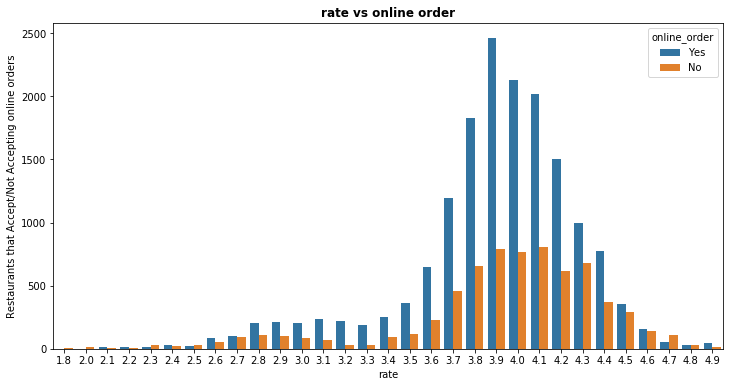

In [217]:
plt.figure(figsize = (12,6))
sns.countplot(x=df['rate'], hue = df['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs online order",weight = 'bold')

# h. Restaurant type and rating

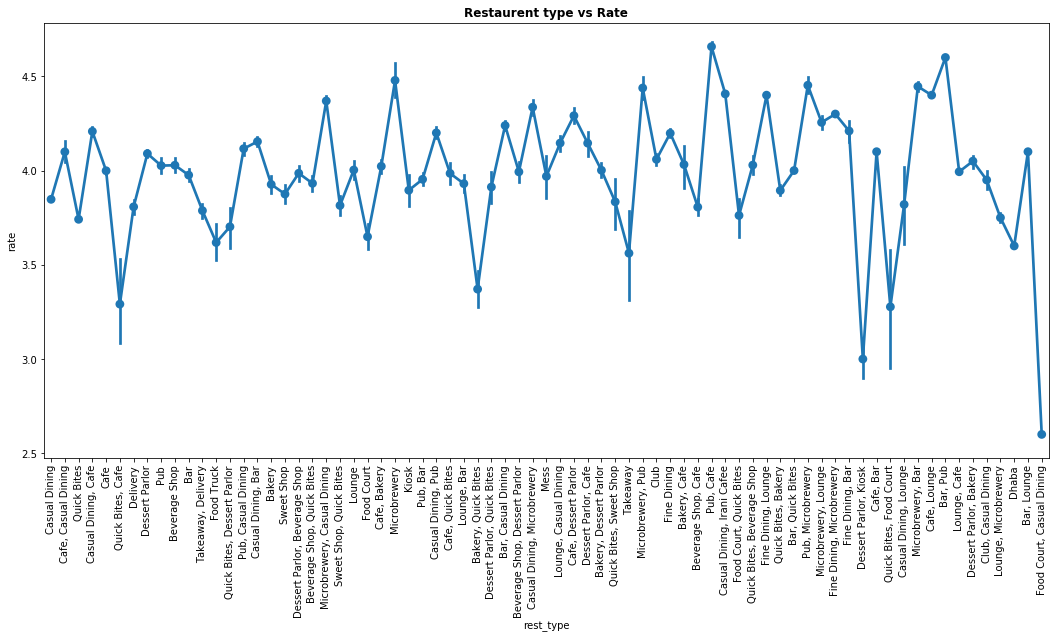

In [218]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=df["rest_type"], y=df["rate"], data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

# 4. Inferences after exploratory data analysis

Based on the EDA, we have the following inferences.

1. Target location - BTM
2. Target Restaurant Category - Quick Bytes
3. Target Cuisine Style - North Indian
4. Target Dish - Pasta
5. Target Price - 300
6. Target Rating - 3.9

# 5. Preprocessing for building the models

In [219]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)

In [220]:
df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

In [221]:
df['rest_type'] = df['rest_type'].str.replace(',' , '') 
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['rest_type'].value_counts().head()

Casual Dining        7331
Bites Quick          5253
Cafe                 2375
Bar Casual Dining    1321
Dessert Parlor       1083
Name: rest_type, dtype: int64

In [222]:
df['cuisines'] = df['cuisines'].str.replace(',' , '') 
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['cuisines'].value_counts().head()

Indian North                         1152
Chinese Indian North                  852
Chinese Indian Indian North South     455
Indian South                          366
Cream Desserts Ice                    334
Name: cuisines, dtype: int64

# Label Encoder

In [223]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
df['location'] = T.fit_transform(df['location'])
df['rest_type'] = T.fit_transform(df['rest_type'])
df['cuisines'] = T.fit_transform(df['cuisines'])

In [224]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,29,951,800
1,Spice Elephant,1,0,4.1,787,1,29,963,800
2,San Churro Cafe,1,0,3.8,918,1,22,806,800
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300
4,Grand Village,0,0,3.8,166,4,29,1237,600


In [225]:
df["average_cost"] = df["average_cost"].str.replace(',' , '') 

In [226]:
df["average_cost"] = df["average_cost"].astype('float')

In [227]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,29,951,800.0
1,Spice Elephant,1,0,4.1,787,1,29,963,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,806,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,19,1201,300.0
4,Grand Village,0,0,3.8,166,4,29,1237,600.0


In [228]:
X = df.drop(['rate','name'],axis = 1)

In [229]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,average_cost
0,1,1,775,1,29,951,800.0
1,1,0,787,1,29,963,800.0
2,1,0,918,1,22,806,800.0
3,0,0,88,1,19,1201,300.0
4,0,0,166,4,29,1237,600.0


In [230]:
y = df['rate']

# Splitting the data for model building

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 22)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23259 entries, 0 to 51715
Data columns (total 9 columns):
name            23259 non-null object
online_order    23259 non-null uint8
book_table      23259 non-null uint8
rate            23259 non-null float64
votes           23259 non-null int64
location        23259 non-null int32
rest_type       23259 non-null int32
cuisines        23259 non-null int32
average_cost    23259 non-null float64
dtypes: float64(2), int32(3), int64(1), object(1), uint8(2)
memory usage: 1.8+ MB


# Standardisation of values

If the values are standardized, it will be easy for the models to be trained well.

In [234]:
from sklearn.preprocessing import StandardScaler
num_values1=df.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df[num_values1])
df[num_values1]=scaler.transform(df[num_values1])

In [235]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,0.455722,0.152328,1,29,951,0.089176
1,Spice Elephant,1,0,0.455722,0.163105,1,29,963,0.089176
2,San Churro Cafe,1,0,-0.248401,0.280757,1,22,806,0.089176
3,Addhuri Udupi Bhojana,0,0,-0.483109,-0.464668,1,19,1201,-0.871467
4,Grand Village,0,0,-0.248401,-0.394616,4,29,1237,-0.295081


# 6. Models

# a. Linear Regression

In [236]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred = linear_regression.predict(X_test)

In [237]:
linear_regression.score(X_test, y_test)*100

20.565426351757576

# b. Random Forest Regression

In [238]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)
y_pred = random_forest_regressor.predict(X_test)

C:\Users\Idea\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [239]:
random_forest_regressor.score(X_test,y_test)*100

91.9674148060023

In [240]:
randomforest = pd.DataFrame({ "actual": y_test, "pred": y_pred })
randomforest.head()

,actual,pred
17577,4.3,4.29
12395,4.1,4.10
41620,3.6,3.40
11719,2.7,2.91
42483,4.0,3.97


# c. Decision Tree Classifier

In [241]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = RandomForestRegressor()
decision_tree_classifier.fit(X_train,y_train)
y_pred = decision_tree_classifier.predict(X_test)

decision_tree_classifier.score(X_test,y_test)*100

C:\Users\Idea\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


92.02633701805647

In [242]:
decisiontree = pd.DataFrame({ "actual": y_test, "pred": y_pred })
decisiontree.head()

,actual,pred
17577,4.3,4.30
12395,4.1,4.10
41620,3.6,3.40
11719,2.7,2.70
42483,4.0,3.97


# 7. Conclusion

In [1]:
#Compared to Regression, Decision Tree and Random Forest Regressor gave good results.